In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

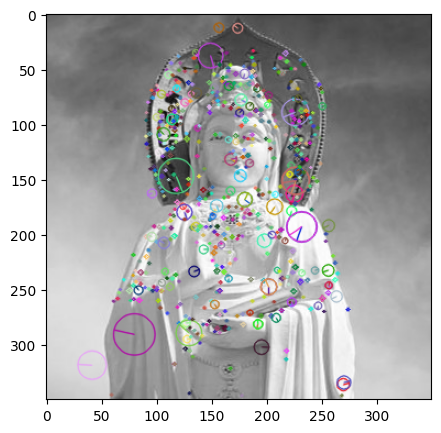

In [3]:
img0 = cv2.imread('assets/guanyin_a.jpg')
gray0 = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)
blur0 = cv2.GaussianBlur(gray0, (7, 7), 0)

sift0 = cv2.SIFT_create()
kp0, des0 = sift0.detectAndCompute(gray0, None)
img0_kp = cv2.drawKeypoints(gray0, kp0, img0, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize = (5, 5))
plt.imshow(img0_kp)

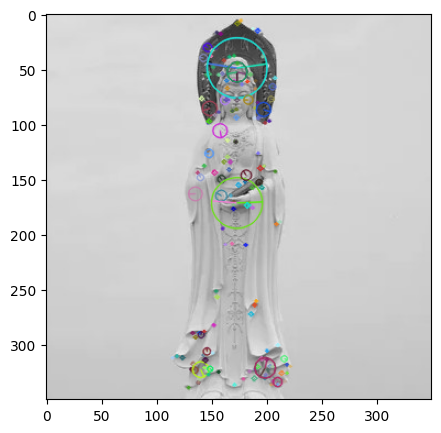

In [4]:
img1 = cv2.imread('assets/guanyin_b.jpg')
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
blur1 = cv2.GaussianBlur(gray1, (7, 7), 0)

sift1 = cv2.SIFT_create()
kp1, des1 = sift1.detectAndCompute(gray1, None)
img1_kp = cv2.drawKeypoints(gray1, kp1, img1, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize = (5, 5))
plt.imshow(img1_kp)

### kp is a tuple containing the keypoint attributes

In [5]:
pnt = kp1[0]
print(f'First keypoint position:\nx: {round(pnt.pt[0])}\ny: {round(pnt.pt[1])}')

First keypoint position:
x: 115
y: 312


In [6]:
print(f'First keypoint scale: {pnt.size}')

First keypoint scale: 1.885562777519226


In [7]:
print(f'First keypoint angle: {pnt.angle}')

First keypoint angle: 181.27244567871094


In [8]:
print(f'First keypoint response: {pnt.response}')

First keypoint response: 0.018777241930365562


In [9]:
print(f'First keypoint octave: {pnt.octave}')

First keypoint octave: 3539455


### Sift - Correspondence between points

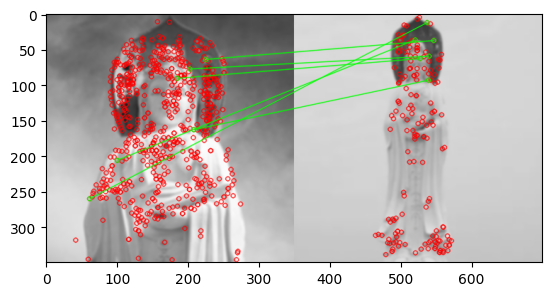

In [10]:
flann = cv2.FlannBasedMatcher(dict(algorithm = 0, trees = 5), {})
matches = flann.knnMatch(des0, des1, k=2)

matchesMask = [[0, 0] for i in range(len(matches))]
good_matches_src = []
good_matches_dst = []

for i, (m, n) in enumerate(matches):
   if m.distance <= 0.725 * n.distance:
      matchesMask[i] = [1, 0]
      good_matches_dst.append(m)
      good_matches_src.append(n)

dst_pt = np.array([kp1[m.trainIdx].pt for m in good_matches_dst])
src_pt = np.array([kp0[n.trainIdx].pt for n in good_matches_src])

sift_img = cv2.drawMatchesKnn(blur0, kp0, blur1, kp1, matches, None, matchColor = (0, 255, 0),
                              singlePointColor = (255, 0, 0), matchesMask = matchesMask, flags = 0)

plt.imshow(sift_img)

### RANSAC - Finding the homography matrix

In [11]:
H, mask = cv2.findHomography(src_pt, dst_pt, cv2.RANSAC, 5)

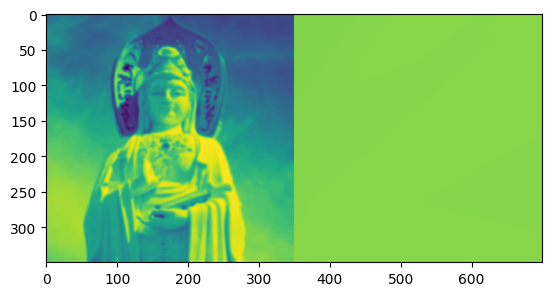

In [12]:
united_img = cv2.warpPerspective(blur1, H, (blur0.shape[1] + blur1.shape[1], blur0.shape[0]))
united_img[0:blur0.shape[0], 0:blur0.shape[1]] = blur0

plt.imshow(united_img)